(array([ 1.71599023,  1.25412799]), [0.70348128761982687], array([ 1.66298402,  1.25650149,  0.69272841]))
[ 1.71599023  1.25412799  0.70348129]
('Coefficients', 'Standard Errors', 't-Statistics', 'p-values')
('1.716       ', '0.0315         ', '54.5597     ', '0.0     ')
('1.2541      ', '0.0305         ', '41.1196     ', '0.0     ')
('0.7035      ', '0.0314         ', '22.4243     ', '0.0     ')


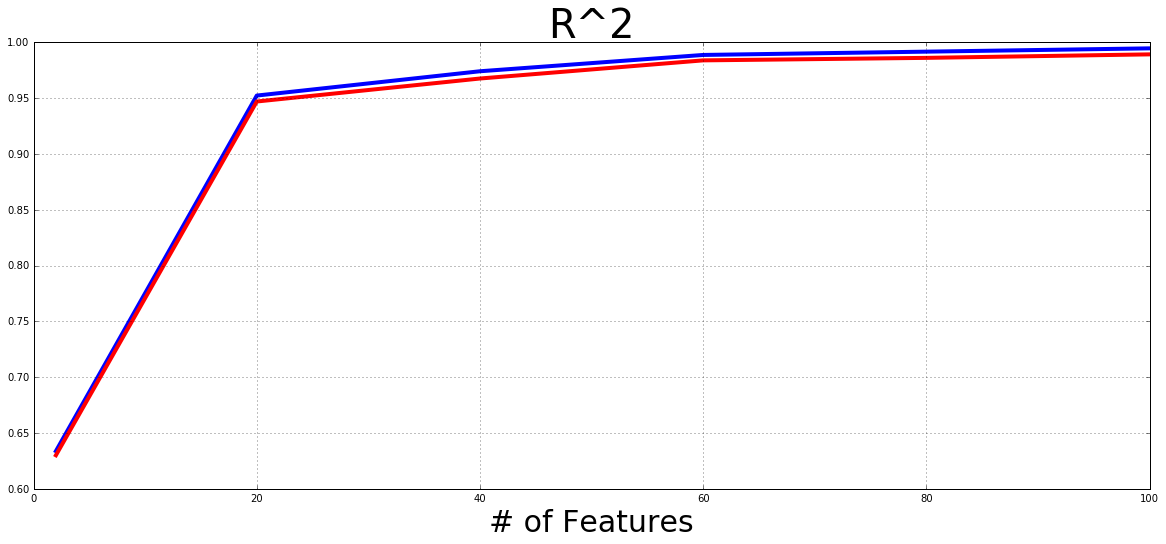

In [2]:
%matplotlib inline


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#A code to run ordinary least squares with associated statistics
#Jeremy Kedziora
#24 March 2016
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



#import libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from scipy.optimize import minimize
from scipy.stats import t
import statsmodels.api as sm    #import statsmodels for the stats models
import matplotlib.pyplot as plt


#define functions
def maker(N,n_vars):
    """A function to generate Monte Carlo linear regression data"""
    x = []    #an empty list to hold the data
    y = np.zeros(N)    #an array to hold the dependent variable
    b = []    #an empty list to hold the true bs
    i = 1
    while i <= n_vars:    #loop over the variables we want to create
        x_i = np.random.normal(loc = 0.0, scale = 1.0, size = N)    #generate the data
        x.append(x_i)    #add it to the list of data
        b_i = np.random.normal(loc = 0.0, scale = 1.0)    #draw a random effect for this variable
        b.append(b_i)    #add it to the list of effects
        y = y + b_i*x_i    #add the variable effect to the dependent variable
        i += 1    #index up i
    
    x.append(np.ones(N))    #and a column of ones for a constant
    b_i = np.random.normal(loc = 0.0, scale = 1.0)    #draw a random intercept
    b.append(b_i)    #append this intercept to the effects
    y = b_i + y + np.random.normal(loc = 0.0, scale = 1.0, size = N)    #add the normally distributed error term and the intercept
    return [np.array(x).T,np.array(y),np.array(b)]

def OLS_mle(b,X,y):
    """A function to compute OLS coefficients using maximum likelihood estimation"""
    s2 = 1.0#math.exp(b[len(b) - 1])    #exponentiate the variance to ensure that it is positive
    xb = X.dot(b[0:(len(b) - 1)])    #compute the means
    return -1*sum(-0.5*math.log(s2) - (y - xb)**2/(2*s2))    #return the log likelihood

def printer(b_1,b_2):
    """A function to print coefficients"""
    for i,j in zip(b_1,b_2):    #loop over coefficients
        print(b_1,b_2)    #and print them!

def tm(Coefficients,Standard_Error,t_stat,p_values):
    """This is a function to make tables of regression or mle results"""
    print('Coefficients','Standard Errors','t-Statistics','p-values')
    j_l_max = 1
    k_l_max = 1
    l_l_max = 1
    m_l_max = 1
    for i,j,k,l in zip(Coefficients,Standard_Error,t_stat,p_values):
        j_l_max = max(j_l_max,len(str(i).split('.')[0]))
        k_l_max = max(k_l_max,len(str(j).split('.')[0]))
        l_l_max = max(l_l_max,len(str(k).split('.')[0]))
        m_l_max = max(m_l_max,len(str(l).split('.')[0]))

    for i in range(len(Coefficients) - 1):

        j = str(round(Coefficients[i],4))
        j_l_adj = ''
        for _ in range(j_l_max - len(str(Coefficients[i]).split('.')[0])):
            j_l_adj = j_l_adj + ' '
        j_adj = ''
        for _ in range(len('Coefficients') - len(j) - len(j_l_adj)):
            j_adj = j_adj + ' '

        k = str(round(Standard_Error[i],4))
        k_l_adj = ''
        for _ in range(k_l_max - len(str(Standard_Error[i]).split('.')[0])):
            k_l_adj = k_l_adj + ' '
        k_adj = ''
        for _ in range(len('Standard Errors') - len(k) - len(k_l_adj)):
            k_adj = k_adj + ' '

        l = str(round(t_stat[i],4))
        l_l_adj = ''
        for _ in range(l_l_max - len(str(t_stat[i]).split('.')[0])):
            l_l_adj = l_l_adj + ' '
        l_adj = ''
        for _ in range(len('t-Statistics') - len(l) - len(l_l_adj)):
            l_adj = l_adj + ' '

        m = str(round(p_values[i],4))
        m_l_adj = ''
        for _ in range(m_l_max - len(str(p_values[i]).split('.')[0])):
            m_l_adj = m_l_adj + ' '
        m_adj = ''
        for _ in range(len('p-values') - len(m) - len(m_l_adj)):
            m_adj = m_adj + ' '
        print(j_l_adj + j + j_adj,k_l_adj + k + k_adj,l_l_adj + l + l_adj,m_l_adj + m + m_adj)

def n_features(n):
    """A function to fit a model with a varying number of features"""
    Data = maker(200,n)    #call the function to make the data
    model = sm.OLS(Data[1], Data[0])    #define the statsmodels model object
    results = model.fit()    #fit it
    #dir(results)    #extract the results
    return [results.rsquared,results.rsquared_adj]



#make the data
N = 1000    #number of observations
n_vars = 2    #number of variables
Data = maker(N,n_vars)    #call the function to make the data



#estimating coefficients using sklearnL
model = LinearRegression()    #define which model to apply
model.fit(Data[0], Data[1])    #fit the model
print(model.coef_[0:2] , [model.intercept_], Data[2])    #compare the estimated coefficients with the real coefficients



#an alternative way to do this using the classic formula:
X = Data[0]    #pull out the explanatory variables and transpose it
Y = Data[1]    #pull out the dependent variables
Coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))    #use the classic formula
print(Coefficients)    #compare the estimated coefficients with the real coefficients

#another way to do this using mle:
X = Data[0]    #pull out the explanatory variables and transpose it
Y = Data[1]    #pull out the dependent variables
b = np.random.uniform(size = len(X[0]) + 1)*0.1    #generate random starting values
Coefficients = minimize(OLS_mle, x0 = b, args = (X,Y), method = 'BFGS').x    #optimize the adaptive lasso

#compute standard errors
s2 = sum((Y - X.dot(Coefficients[0:n_vars+1]))**2)/(N-(n_vars + 1))    #estimate s2
var_hat = s2*np.linalg.inv(X.T.dot(X))    #compute var hat
Standard_Error = (np.diag(var_hat))**0.5    #compute the standard errors
t_stat = Coefficients[0:n_vars+1]/Standard_Error    #compute the t statistics for each variable
p_values = 2*t.pdf(abs(t_stat),df = N - 1)    #compute the p-values
tm(Coefficients,Standard_Error,t_stat,p_values)    #call the table making function to compute the table






#compare r2 as the number of features goes up
r2 = np.zeros(6)    #an array to hold the r2s
r2_adj = np.zeros(6)    #an array to hold the r2_adjs
n_f = np.array([2,20,40,60,80,100])    #an array of # of features
for i in range(len(n_f)):    #loop over features
    r2r2_adj = n_features(n_f[i])    #run model and extract r2
    r2[i] = r2r2_adj[0]    #pull out r2
    r2_adj[i] = r2r2_adj[1]    #pull out r2_adj

#plot
plt.figure(figsize = (20,8))    #initiate the plot
plt.plot(n_f,r2,'b-',n_f,r2_adj,'r-',lw=4)    #generate the plot
plt.xlabel('# of Features',fontsize=30)    #add an x label
plt.title('R^2',fontsize=40)    #add a title to the plot
plt.grid(True)
#plt.savefig('/Users/seniordatascientist/Desktop/Metis Codes/r2.pdf')    #save the plot to file
#plt.show()    #and then show the plot

In [4]:
X.shape

(1000, 3)